# Description
Pretrained weights for VGG16 that wins first place in ImageNet ILSVRC-2014 competition are available [here](http://www.robots.ox.ac.uk/~vgg/research/very_deep/)

In [1]:
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
import matplotlib.pyplot as plt
import numpy as np

import skimage as ski
import skimage.io
import skimage.transform

from keras.layers import Flatten, Dense, Dropout, Input, UpSampling2D
from keras.models import Model
from keras import Sequential

from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [4]:
model = VGG16()
model.summary()

553467904/553467096 [==============================] - 387s 1us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_

Link to an image that you want to classify. Image can be of any size larger than 224x224.  

In [5]:
link = "https://www.aughog.com/wp-content/uploads/2012/07/AugBrella-Best-Umbrella-Auger-Anchor.jpg"

Original shape: (984, 1475, 3) , Shape:  (224, 224, 3)


/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


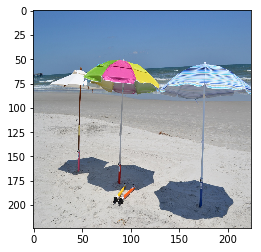

In [6]:
img = ski.io.imread(link)
original_shape = img.shape
img = skimage.transform.resize(img, output_shape=(224, 224, 3), mode="constant") * 255
print("Original shape:", original_shape, ", Shape: ", img.shape)
plt.imshow(img/255)

Find top 5 predictions for the above images

In [7]:
img_clean = preprocess_input(img.reshape(1, * img.shape))
probs = model.predict(img_clean)
print("Probs: ", probs.shape)
decode_predictions(probs, top=5)

Probs:  (1, 1000)
40960/35363 [==================================] - 0s 10us/step


[[('n04507155', 'umbrella', 0.82289433),
  ('n03792972', 'mountain_tent', 0.07564301),
  ('n03944341', 'pinwheel', 0.02620133),
  ('n09193705', 'alp', 0.023353446),
  ('n04228054', 'ski', 0.0128463)]]

The models is pretrained to detect the following objects

In [8]:
print([t[1] for t in decode_predictions(probs, top=1000)[0]])

['umbrella', 'mountain_tent', 'pinwheel', 'alp', 'ski', 'seashore', 'sandbar', 'yurt', 'parking_meter', 'parachute', 'pole', 'flagpole', 'tripod', 'volcano', 'shovel', 'promontory', 'lakeside', 'swing', 'breakwater', 'patio', 'ashcan', 'maypole', 'chime', 'plastic_bag', 'snowplow', 'reel', 'mailbox', 'swab', 'sleeping_bag', 'maze', 'folding_chair', 'crutch', 'trimaran', 'thatch', 'steel_drum', 'horizontal_bar', 'boathouse', 'picket_fence', 'planetarium', 'catamaran', 'bow', 'street_sign', 'Dutch_oven', 'West_Highland_white_terrier', 'cliff', 'sundial', 'Samoyed', 'schipperke', 'torch', 'stupa', 'swimming_trunks', 'solar_dish', 'birdhouse', 'bathing_cap', 'dome', 'dogsled', 'bucket', 'balloon', 'snowmobile', 'minivan', 'paintbrush', 'greenhouse', 'flamingo', 'speedboat', 'maillot', 'conch', 'fountain', 'tricycle', 'valley', 'barn', 'unicycle', 'pier', 'missile', 'shopping_cart', 'traffic_light', 'lifeboat', 'wreck', 'sweatshirt', 'mobile_home', 'chainlink_fence', 'pot', 'bubble', 'saron

In [9]:
model = VGG16(input_shape=(64, 64, 3), include_top=False, classes=10)
model.summary()

58892288/58889256 [==============================] - 36s 1us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_poo

In [10]:
for i, layer in enumerate(model.layers):
    layer.trainable = False

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [12]:
inputs = Input(shape=(32, 32, 3))
cifar = UpSampling2D(size=(2, 2))(inputs) 
cifar = model(cifar) 
cifar = Flatten()(cifar) 
cifar = Dense(10, activation="softmax")(cifar)

model2 = Model(inputs, cifar)

model2.compile(loss="categorical_crossentropy"
                      , metrics=["accuracy"]
                      , optimizer="adam")
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 64, 64, 3)         0         
_________________________________________________________________
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 14,735,178
Trainable params: 20,490
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
import os, pickle
import pickle

def cifar10(data_path):

    def _load_data_(files):
        X = np.empty([0, 3072])
        y = np.empty([0])
        for path in files:
            print(path)
            with open(path, "rb") as f:
                d = pickle.load(f, encoding='bytes')
                X = np.vstack([X, d[b"data"]]).astype("uint8")
                y = np.hstack([y, d[b"labels"]]).astype("uint8")
        return X, y
    
    training_files = [os.path.join(data_path, "data_batch_{0}".format(i))  for i in range(1, 6)]
    test_files = [os.path.join(data_path, "test_batch")]
    labels_file = os.path.join(data_path, "batches.meta")

    X_train, y_train = _load_data_(training_files)
    X_test, y_test = _load_data_(test_files)

    X_train = X_train.reshape([-1, 3, 32, 32]).transpose([0, 2, 3, 1])/255
    X_test = X_test.reshape([-1, 3, 32, 32]).transpose([0, 2, 3, 1])/255

    with open(labels_file, "rb") as f:
        labels = pickle.load(f, encoding="bytes")
    labels = [s.decode("utf-8")  for s in labels[b'label_names']]
    return X_train, X_test, y_train, y_test, labels

X_train, X_test, y_train, y_test, labels = cifar10("/data/cifar-10-batches-py/")
print("X_train:", X_train.shape, 
      "\nX_test:", X_test.shape, 
      "\ny_train: ", y_train.shape, 
      "\ny_test:", y_test.shape, 
      "\nlabels: ", labels)

eye = np.eye(len(labels))
Y_train = eye[y_train]
Y_test = eye[y_test]
Y_train.shape, Y_test.shape

/data/cifar-10-batches-py/data_batch_1
/data/cifar-10-batches-py/data_batch_2
/data/cifar-10-batches-py/data_batch_3
/data/cifar-10-batches-py/data_batch_4
/data/cifar-10-batches-py/data_batch_5
/data/cifar-10-batches-py/test_batch
X_train: (50000, 32, 32, 3) 
X_test: (10000, 32, 32, 3) 
y_train:  (50000,) 
y_test: (10000,) 
labels:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


((50000, 10), (10000, 10))

In [14]:
from time import time
tboard = TensorBoard(log_dir="/tmp/tf/log/%d" % time())
model2.fit(x=X_train, y = Y_train
          , validation_data = (X_test, Y_test)
          , batch_size = 128
          , callbacks=[tboard]
          , epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 855s 17ms/step - loss: 1.2620 - acc: 0.5838 - val_loss: 1.0604 - val_acc: 0.6465
Epoch 2/10
50000/50000 [==============================] - 862s 17ms/step - loss: 0.9789 - acc: 0.6720 - val_loss: 0.9630 - val_acc: 0.6747
Epoch 3/10
50000/50000 [==============================] - 884s 18ms/step - loss: 0.9053 - acc: 0.6953 - val_loss: 0.9258 - val_acc: 0.6848
Epoch 4/10
50000/50000 [==============================] - 911s 18ms/step - loss: 0.8616 - acc: 0.7084 - val_loss: 0.8937 - val_acc: 0.6974
Epoch 5/10
34432/50000 [===================>..........] - ETA: 3:58 - loss: 0.8307 - acc: 0.7195

KeyboardInterrupt: 